# Домашнее задание 3. Pandas (HW)

## Гладышев В.В.

В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

#### Файл train.csv

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


- **row_id**: (int64) ID code for the row.
- **timestamp**: (int64) the time in milliseconds between this user interaction and the first event completion from that user.
- **user_id**: (int32) ID code for the user.
- **content_id**: (int16) ID code for the user interaction
- **content_type_id**: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.
- **task_container_id**: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.
- **user_answer**: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
- **answered_correctly**: (int8) if the user responded correctly. Read -1 as null, for lectures.
- **prior_question_elapsed_time**: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.
- **prior_question_had_explanation**: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

In [4]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


#### Файл questions.csv

In [6]:
questions = pd.read_csv("questions.csv")

In [7]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


**Метаданные для вопросов пользователям**

- **question_id**: foreign key for the train/test content_id column, when the content type is question (0).
- **bundle_id**: code for which questions are served together.
- **correct_answer**: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
- **part**: the relevant section of the TOEIC test.
- **tags**: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

In [8]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [9]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


#### Файл lectures.csv

In [10]:
lectures = pd.read_csv("lectures.csv")

In [11]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


**Метаданные на лекции прослушанные студентами**
- **lecture_id**: foreign key for the train/test content_id column, when the content type is lecture (1).
- **part**: top level category code for the lecture.
- **tag**: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.
- **type_of**: brief description of the core purpose of the lecture.

In [12]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [13]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


### Обработка пропусков

In [14]:
train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

#### Признак train.prior_question_elapsed_time

In [15]:
train.prior_question_elapsed_time.describe()

count    9.887879e+07
mean     2.542381e+04
std      1.994815e+04
min      0.000000e+00
25%      1.600000e+04
50%      2.100000e+04
75%      2.966600e+04
max      3.000000e+05
Name: prior_question_elapsed_time, dtype: float64

In [16]:
train.prior_question_elapsed_time.fillna(0, inplace=True)

In [17]:
train.prior_question_elapsed_time.describe()

count    1.012303e+08
mean     2.483323e+04
std      2.008360e+04
min      0.000000e+00
25%      1.500000e+04
50%      2.100000e+04
75%      2.900000e+04
max      3.000000e+05
Name: prior_question_elapsed_time, dtype: float64

#### Признак train.prior_question_had_explanation

In [18]:
train.prior_question_had_explanation.unique()

array([nan, False, True], dtype=object)

In [19]:
train.prior_question_had_explanation.fillna(2, inplace=True)

In [20]:
train.prior_question_had_explanation.unique()

array([2, False, True], dtype=object)

In [26]:
train.loc[train["prior_question_had_explanation"] == True, "prior_question_had_explanation"] = 1

In [27]:
train.loc[train["prior_question_had_explanation"] == False, "prior_question_had_explanation"] = 0

In [28]:
train.prior_question_had_explanation.unique()

array([2, 0, 1], dtype=object)

In [30]:
train.prior_question_had_explanation = train.prior_question_had_explanation.astype(int)
train.prior_question_had_explanation.dtypes

dtype('int32')

In [31]:
train.isnull().sum()

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 7.2 GB


#### Признак questions.tags

In [33]:
questions.tags

0         51 131 162 38
1             131 36 81
2        131 101 162 92
3        131 149 162 29
4          131 5 162 38
              ...      
13518                14
13519                 8
13520                73
13521               125
13522                55
Name: tags, Length: 13523, dtype: object

In [34]:
questions.tags.fillna("", inplace=True)

In [35]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13523 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


#### Признак lectures.type_of

In [37]:
lectures.type_of.unique()

array(['concept', 'solving question', 'intention', 'starter'],
      dtype=object)

### Определение категориальных признаков

In [46]:
train_linear = []
train_categorical = []
for col in train.columns:
    uniq_cnt = len(train[col].unique())
    print(f"Признак {col} - уникальных значений: {uniq_cnt}")
    if uniq_cnt < 10:
        train_categorical.append(col)
    else:
        train_linear.append(col)

Признак row_id - уникальных значений: 101230332
Признак timestamp - уникальных значений: 72821015
Признак user_id - уникальных значений: 393656
Признак content_id - уникальных значений: 13782
Признак content_type_id - уникальных значений: 2
Признак task_container_id - уникальных значений: 10000
Признак user_answer - уникальных значений: 5
Признак answered_correctly - уникальных значений: 3
Признак prior_question_elapsed_time - уникальных значений: 3258
Признак prior_question_had_explanation - уникальных значений: 3


In [49]:
gr = train.groupby(['user_answer'])['user_id'].count()
gr

user_answer
-1     1959032
 0    28186489
 1    26990007
 2    18010020
 3    26084784
Name: user_id, dtype: int64

In [45]:
questions_linear = []
questions_categorical = []
for col in questions.columns:
    uniq_cnt = len(questions[col].unique())
    print(f"Признак {col} - уникальных значений: {uniq_cnt}")
    if uniq_cnt < 10:
        questions_categorical.append(col)
    else:
        questions_linear.append(col)

Признак question_id - уникальных значений: 13523
Признак bundle_id - уникальных значений: 9765
Признак correct_answer - уникальных значений: 4
Признак part - уникальных значений: 7
Признак tags - уникальных значений: 1520


In [44]:
lectures_linear = []
lectures_categorical = []
for col in lectures.columns:
    uniq_cnt = len(lectures[col].unique())
    print(f"Признак {col} - уникальных значений: {uniq_cnt}")
    if uniq_cnt < 10:
        lectures_categorical.append(col)
    else:
        lectures_linear.append(col)

Признак lecture_id - уникальных значений: 418
Признак tag - уникальных значений: 151
Признак part - уникальных значений: 7
Признак type_of - уникальных значений: 4


## Визуализация

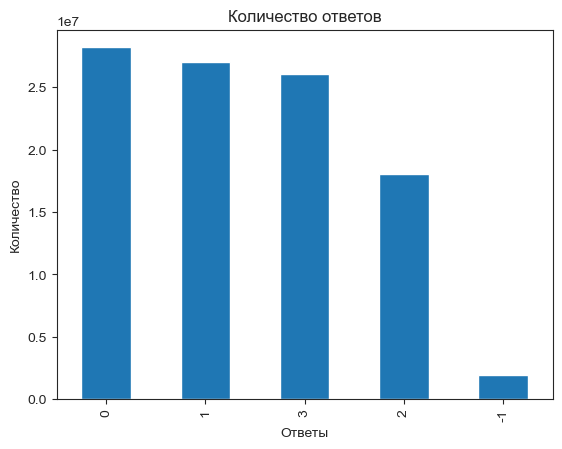

In [65]:
user_answer_counts = train['user_answer'].value_counts()
user_answer_counts.plot(kind='bar', stacked=True)
plt.title('Количество ответов')
plt.xlabel('Ответы')
plt.ylabel('Количество')
plt.show()

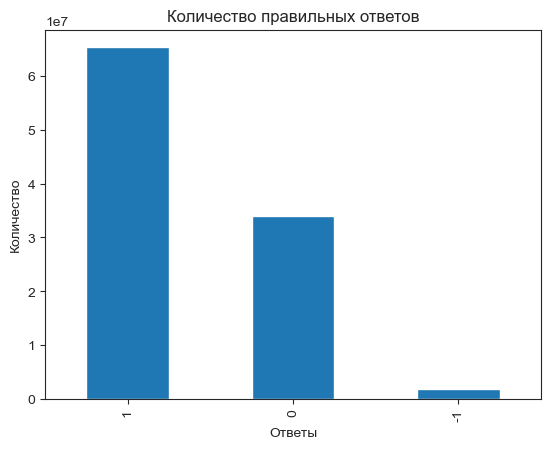

In [66]:
answered_correctly_counts = train['answered_correctly'].value_counts()
answered_correctly_counts.plot(kind='bar', stacked=True)
plt.title('Количество правильных ответов')
plt.xlabel('Ответы')
plt.ylabel('Количество')
plt.show()

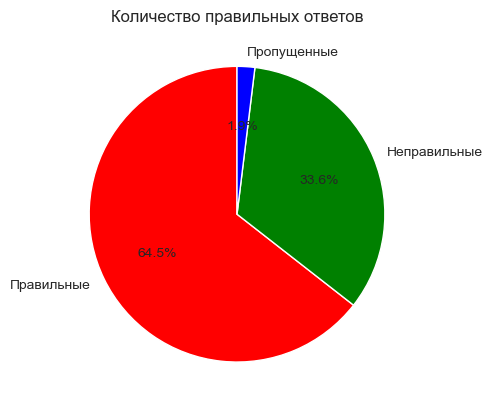

In [71]:
answered_correctly_counts = train['answered_correctly'].value_counts()
plt.pie(answered_correctly_counts, labels=['Правильные', 'Неправильные', 'Пропущенные'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Количество правильных ответов')
plt.show()

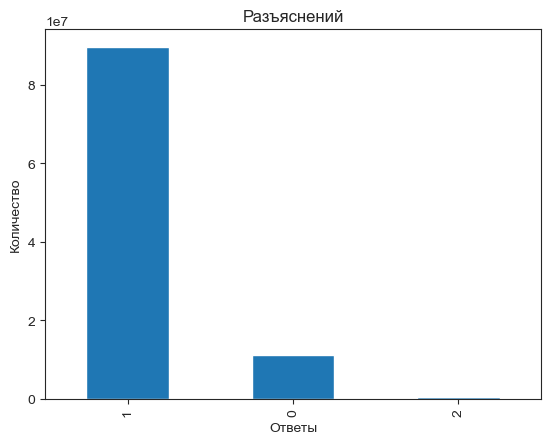

In [67]:
prior_question_had_explanation_counts = train['prior_question_had_explanation'].value_counts()
prior_question_had_explanation_counts.plot(kind='bar', stacked=True)
plt.title('Разъяснений')
plt.xlabel('Ответы')
plt.ylabel('Количество')
plt.show()

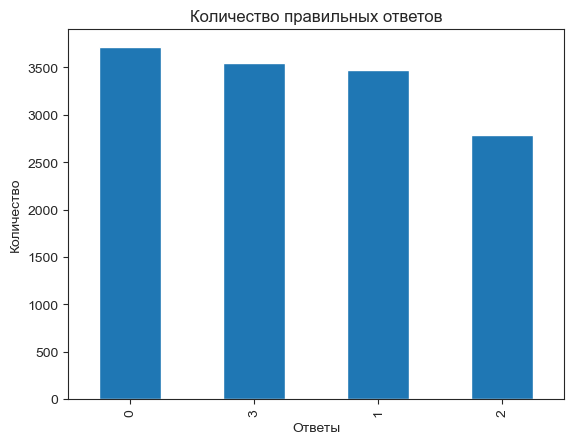

In [68]:
correct_answer_counts = questions['correct_answer'].value_counts()
correct_answer_counts.plot(kind='bar', stacked=True)
plt.title('Количество правильных ответов')
plt.xlabel('Ответы')
plt.ylabel('Количество')
plt.show()

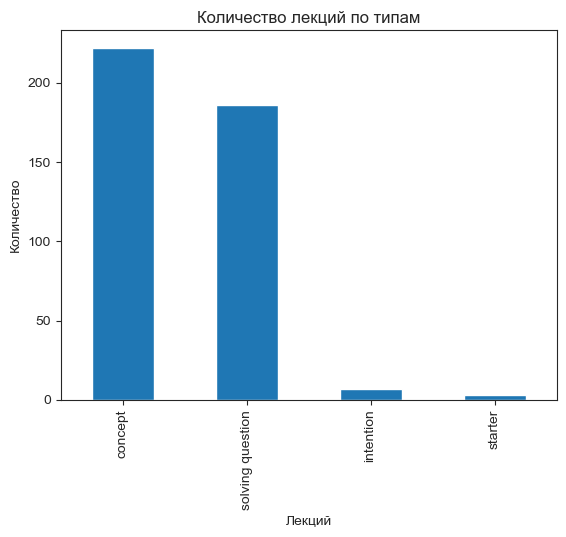

In [69]:
type_of_counts = lectures['type_of'].value_counts()
type_of_counts.plot(kind='bar', stacked=True)
plt.title('Количество лекций по типам')
plt.xlabel('Лекций')
plt.ylabel('Количество')
plt.show()

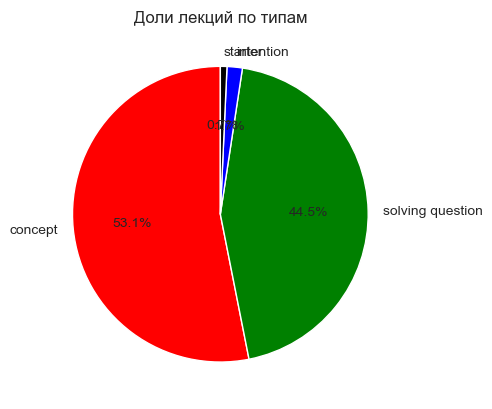

In [74]:
type_of_counts = lectures['type_of'].value_counts()
plt.pie(type_of_counts, labels=lectures['type_of'].unique(), autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'black'])
plt.title('Доли лекций по типам')
plt.show()

<Axes: >

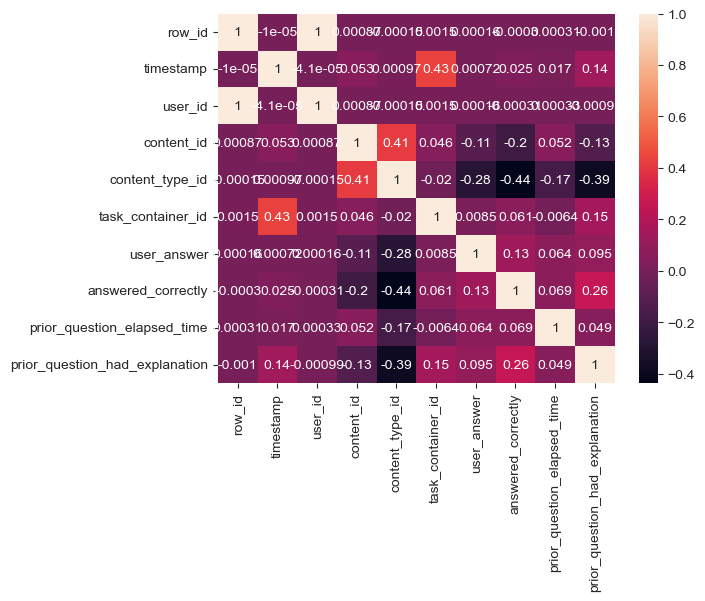

In [61]:
sns.heatmap(train.corr('pearson'), annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


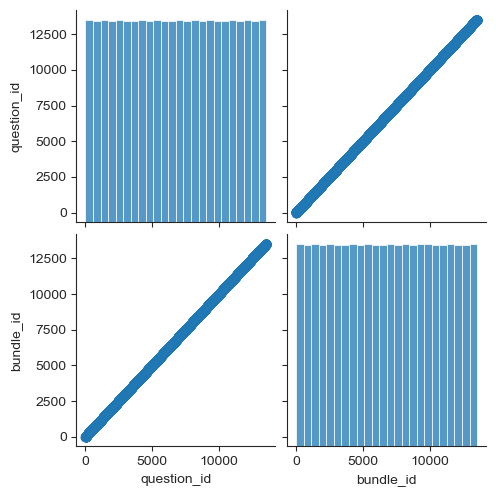

In [51]:
sns.set_style("ticks")
sns.pairplot(questions[questions_linear], kind="reg")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


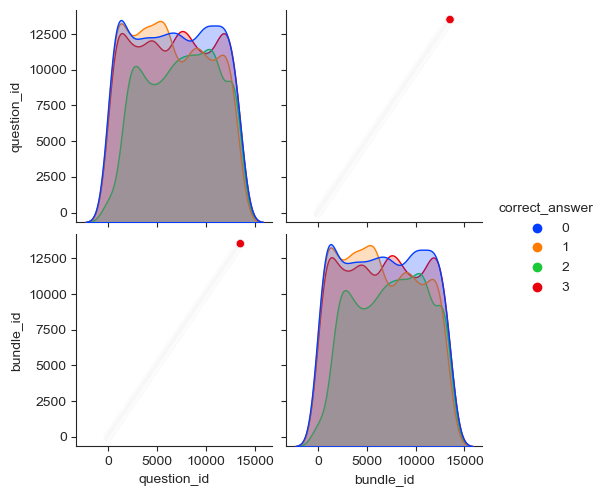

In [57]:
sns.set_style("ticks")
sns.pairplot(questions[['question_id', 'bundle_id', 'correct_answer']],hue = 'correct_answer',diag_kind = "kde",kind = "scatter",palette = "bright")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


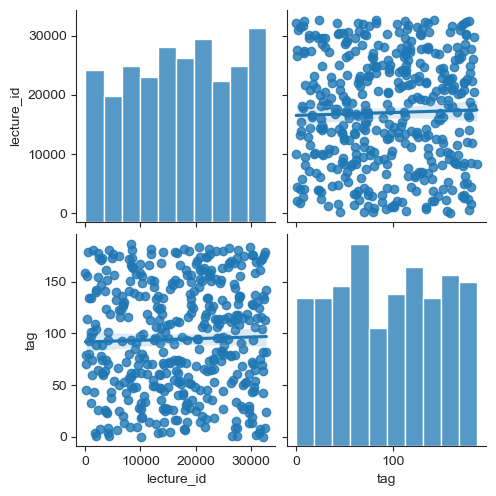

In [52]:
sns.set_style("ticks")
sns.pairplot(lectures[lectures_linear], kind="reg")
plt.show()